In [2]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import simulation
from topology import nodes_admix,nodes_simple,events_admix,events_simple
from likelihood import create_nodes_map,mig_matrix, expected_ratio,frac_function_pm,frac_function


In [51]:
frac_function_pm(5000,1,10,0,3000).eval()

array(0.01770695)

In [38]:

np.random.seed(40)
observed_data = np.random.normal(0.0177,0.25,1000)

with pm.Model() as adv:
    N1 = pm.Gamma('N1',alpha = 20,beta = 0.005)
    T1 = pm.Exponential('T1',lam = 1/3000)
    obs = pm.Normal('obs',mu=frac_function_pm(N1,0,1,0,T1),sigma = 0.25,observed = observed_data)
    approx = pm.fit(method='advi', n=100000)
    trace = approx.sample(draws=5000)

Output()

Finished [100%]: Average Loss = 30.618


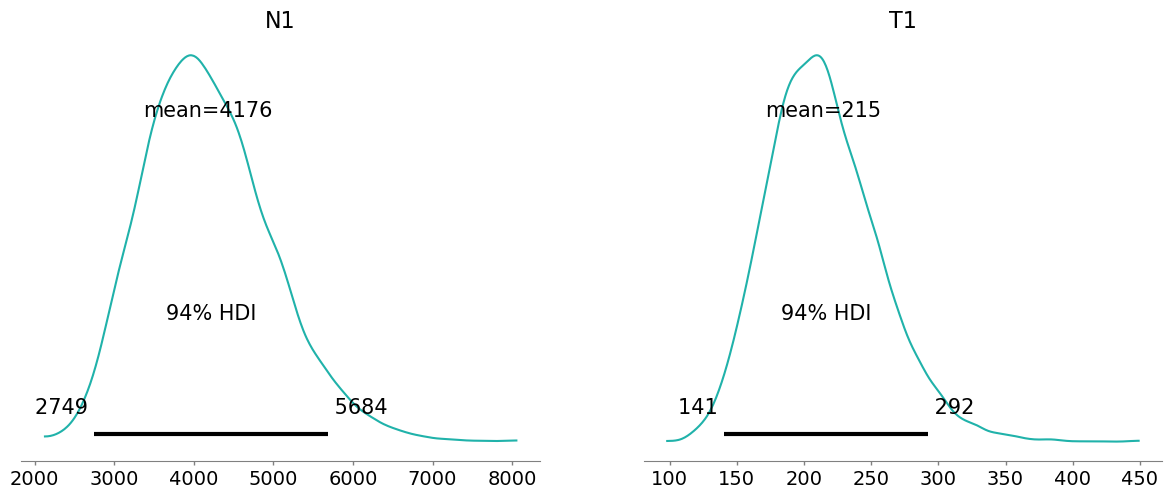

In [39]:
az.plot_posterior(approx.sample(10000), color="LightSeaGreen");


In [48]:
np.random.seed(40)
observed_data = np.random.normal(0.4314,0.25,100)

with pm.Model() as basic:
    N1 = pm.Gamma('N1',alpha = 25,beta = 0.005)
    T1 = pm.Exponential('T1',lam = 1/3000)
    obs = pm.Normal('obs',mu=frac_function_pm(N1,0,1,0,T1),sigma = 0.25,observed = observed_data)
    mean_field = pm.fit(obj_optimizer=pm.adagrad_window(learning_rate=1e-2))
    trace = mean_field.sample(draws=5000)

Output()

Finished [100%]: Average Loss = 4.2499


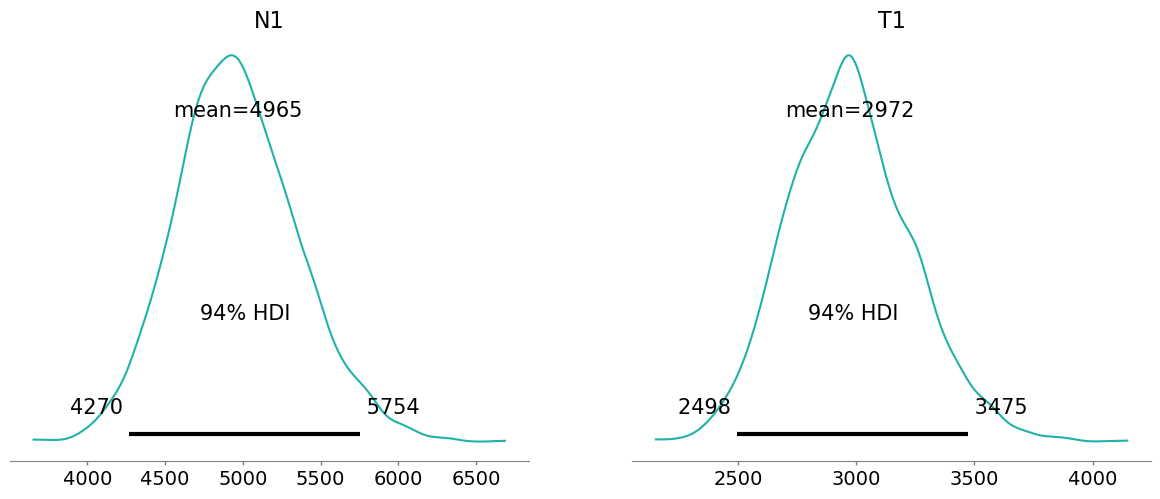

In [49]:
az.plot_posterior(trace, color="LightSeaGreen");
